<img src="udlap.jpg" width="300" />

# Handwritten Digit Recognition

This tutorial guides you through a classic computer vision application using the framework Keras: identify hand written digits with a multi-layer perceptron neural network.


## Introduction

Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks. Deep learning algorithms are actually Deep architectures of consecutive layers. Each layer applies a nonlinear transformation on its input and provides a representation in its output. The objective is to learn a complicated and abstract representation of the data in a hierarchical manner by passing the data through multiple transformation layers. The sensory data (for example pixels in an image) is fed to the first layer. Consequently the output of each layer is provided as input to its next layer.

Currently there are many tools available to start in the deep learning field like Keras, Pythorch, Tensorflow, etc.

Keras is a powerful easy-to-use Python library for developing and evaluating deep learning models across many platforms. It wraps the efficient numerical computation libraries like Theano, TensorFlow or CNTK and allows you to define and train neural network models in a few short lines of code with the use of it's consistent & simple APIs. Keras is without a doubt the easier option if you want a plug & play framework: to quickly build, train, and evaluate a model, without spending much time on mathematical implementation details.

The next figure show the general architecture of Keras.
![title](KerasaRchitecture.jpg)
The flexible architecture allows you to deploy computation to one or more CPUs or GPUs with a single API.

### The key concepts

**Tensor** is a general name of multi-way array data. For example, 1-d tensor is a vector, 2d-tensor is a matrix and 3d-tensor is a cube. We can image 4d-tensor as a vector of cubes. Insimilar way, 5d-tensor is a matrix of cubes, and 6d-tensor is a cube of cubes.

<img src="Tensors.png" style="max-width:50%; width: 50%; max-width: none">

A tensor is defined by three key attributes:
* Number of axes (rank): For instance, a 3D tensor has three axes, and a matrix has two axes.
* Shape: This is a tuple of integers that describes how many dimensions the tensor has along each axis.
* Data type (usually called dtype in Python libraries): This is the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8, float64, and so on.




## Tools

* Keras (for developing and evaluating deep learning models)
* Matplot (to graph training history)
* Numpy (for data types and tensor operations)
* Scikitlearn (for data normalization)


## Step 1: Load the MNIST dataset
We first load the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, a classic in the machine-learning community, which has been around almost as long as the field itself and has been intensively studied. It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. Each image in this dataset has been resized into 28x28 with grayscale values between 0 and 254.

The following code load the images and the according labels. The variables x_train and y_train form the training set, the data that the model will learn from. The model will then be tested on the test set (x_test and y_test variables).

In [1]:
import keras
from keras.datasets import mnist
import numpy
(x_train, y_train), (x_test, y_test) = mnist.load_data() # The dataset will be downloaded the first time.

Using TensorFlow backend.


To see the dataset's content we plot the first 10 images and print their labels from training set. The next code iterate over the first 10 samples of the train set and use library matplotlib to show the images graphically and print the respective labels.

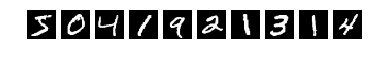

label: [5 0 4 1 9 2 1 3 1 4]


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i], cmap='Greys_r')
    plt.axis('off')
plt.show()
print('label: %s' % (y_train[0:10],))

The next code show the shape (dimensions) of the train and test sets.

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


We see that there are 60,000 and 10,000 samples for the train and test sets respectively with an array of 28 by 28 pixels each one.

## Step 2: Preprocess input data for neural network

The MNIST training dataset is structured as a 3-dimensional array of instance, image width and image height. For a multi-layer model <b>we must reduce the datasets down into a two dimensional array</b> by applying reshaping. Apply tensor reshaping means rearrangement of its dimensions to match a target shape (in this case the input shape needed by the following neural network's input <b>densely connected layer</b> of the step 4 that is a two dimensional array).

The following code transforms the train and test sets with shape of (n_samples, image_width, image_height) to (n_samples, image_width * image_height).


In [4]:
x_train = x_train.reshape(x_train.shape[0], 784)# image_width * image_height = 784
x_test = x_test.reshape(x_test.shape[0], 784) # 28 * 28 = 784

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Reduce our memory requirements by forcing the precision of the pixel values to be 32 bit, the default precision used by Keras anyway. The next code cast the datatype of each value within the train and test sets.

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

When using neural network models is a good idea to perform normalization of the values to the range 0 and 1. The next code use a function from Scikitlearn to normalize (values between 0 and 1) each value within the train and test sets.

In [6]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Step 3: Preprocess class labels for neural network

First of all we show class label's shape of train and test sets. 

In [7]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


The number of values per sample isn't clear because there is a blank value. Let's show the first 10 training's label values.

In [8]:
print y_train[:10]

[5 0 4 1 9 2 1 3 1 4]


The problem is that there are 1-dimensional class arrays and the model spects a class matrix. Then we convert the 1-dimensional class arrays into a 10-dimensional class matrix. We can easily do this using the built-in to_categorical() helper function in Keras (this step is also called one hot encoding). <br><br>
The next code use the to_categorical() function to convert the 1-dimensional class arrays into a 10-dimensional class matrix of the train and test sets and show again it's shapes.

In [9]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


Now we have the needed 10-dimensional matrix per label.

Let's show the first 10 labels again.

In [10]:
print y_train[:10]

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Now there is a matrix of float numbers instead of only one integer number, indicating the probability of each class in a normalized way (the average of each matrix is one).

## Step 4: Define model's arquitecture and layers

In this tutorial we will use an multi-layer perceptron that is perhaps one of the most traditional type of deep learning architecture, and that's when every neuron of a previous layer, is connected to every neuron of the next layer. It looks like this:


![title](nb1-2.png)

Optional: If you want to see a neural network in action on the browser [click here](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.70873&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&learningRate_hide=true&regularizationRate_hide=true&regularization_hide=true&percTrainData_hide=true&noise_hide=true) and press the play button.
<br><br><br>
In Keras to define a model there are two ways:
* By using the [Sequential Model](https://keras.io/models/sequential) that is a linear stack of layers.
* Or by using [the functional API](https://keras.io/models/model) that is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.
<br>

Let's start by declaring a sequential model, which is the most common way by far.

In [11]:
from keras.models import Sequential

model = Sequential()

Now declare the input layer, as a 784 way [densely connected](https://keras.io/layers/core/#dense) (also called fully connected). A dense layer is just a regular layer of neurons in a neural network. Each neuron recieves input from all the neurons in the previous layer (in this case the input data), thus densely connected. <br>

In [12]:
from keras.layers import Dense

model.add(Dense(28*28, input_dim=28*28, activation='sigmoid', kernel_initializer='normal'))

The first parameter corresponds to the dimensionality of the output space (the number of outgoing units or neurons).<br>
The input shape (second parameter) should be the same of the training input (in this case the number of features).<br>
The sigmoid activation function (third parameter) is used for models where we have to predict the probability as an output.<br>
The [kernel_initializer supported by Keras](https://keras.io/initializers/) specifies how the layer's weights are initially randomized. 
<br><br>
Dense layer implements the operation: output = <b>activation(dot(input, kernel) + bias)</b> where:<br>
<b>activation</b> is the activation function.<br>
<b>dot</b> means the multiplication of input and kernel arrays.<br>
<b>input</b> is the training data.<br>
<b>kernel</b> is an array containing the weight of each neuron which initial values was generated randomly.<br>
<b>bias</b> is a vector created by the layer which initial values was generated randomly.<br>
<br>
The [activations supported by keras](https://keras.io/activations/) are the following:
![title](nb1-3.png)
<br><br>

At this point we can add more layers to our model like we're  building legos.

The next code adds the output layer to the model with 10 neurons (corresponding to the 10 classes of digits):

In [13]:
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))

The softmax activation function is used on the output layer to turn the outputs into probability-like (values between 0 and 1).<br>
Note that <b>Keras automatically handles the connections between layers</b>.
<br><br>

The resulting model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784) and an output layer with 10 neurons (number of classes).

![title](nb1-1.jpg)

## Step 5: Compile model

At this point only we need to define the loss function and the optimizer, and then the model will be ready to train.

Compile a model means the declaration of the loss function and the optimizer (SGD, Adam, etc).

In [14]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Keras has a variety of [loss functions](https://keras.io/objectives/) and out-of-the-box [optimizers](https://keras.io/optimizers/) to choose from.

## Step 6: Fit model on training data

To fit the model, all we have to do is to declare the batch size and number of epochs to train for, then pass in our training data.

In [15]:
history = model.fit(x_train, y_train, 
                    batch_size=32, 
                    epochs=30, 
                    verbose=2,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
 - 35s - loss: 0.3602 - acc: 0.8949 - val_loss: 0.2295 - val_acc: 0.9345
Epoch 2/30
 - 34s - loss: 0.1889 - acc: 0.9438 - val_loss: 0.1522 - val_acc: 0.9578
Epoch 3/30
 - 33s - loss: 0.1232 - acc: 0.9636 - val_loss: 0.1273 - val_acc: 0.9609
Epoch 4/30
 - 32s - loss: 0.0864 - acc: 0.9739 - val_loss: 0.0975 - val_acc: 0.9698
Epoch 5/30
 - 34s - loss: 0.0622 - acc: 0.9812 - val_loss: 0.0896 - val_acc: 0.9740
Epoch 6/30
 - 33s - loss: 0.0459 - acc: 0.9861 - val_loss: 0.0982 - val_acc: 0.9696
Epoch 7/30
 - 33s - loss: 0.0336 - acc: 0.9901 - val_loss: 0.0785 - val_acc: 0.9762
Epoch 8/30
 - 33s - loss: 0.0237 - acc: 0.9931 - val_loss: 0.0784 - val_acc: 0.9761
Epoch 9/30
 - 35s - loss: 0.0180 - acc: 0.9950 - val_loss: 0.0768 - val_acc: 0.9772
Epoch 10/30
 - 33s - loss: 0.0131 - acc: 0.9965 - val_loss: 0.0710 - val_acc: 0.9795
Epoch 11/30
 - 33s - loss: 0.0099 - acc: 0.9976 - val_loss: 0.0786 - val_acc: 0.9792
Epoch 12/30
 - 33s - los

## Step 7: Evaluate model on test data

We can evaluate our model on the test data.

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.09127330891543002)
('Test accuracy:', 0.9826)


## Step 8: Graph training history

We can graph the training history to visualize the neural network performance over each iteration and to detect  overfitting. <br>
The overfitting is the case where the predictor model fits perfectly on the training examples, but does badly on the test examples and can be visualized by the separation of the train and test curves in the graphs. The overfit can be avoided by reducing the number of neurons (the higher the number of hidden nodes the more the network will adapt to the training data and "remember" it, thereby preventing generalization) that depends on the complexity of the dataset (the more complex our data set, the more hidden nodes are needed). 

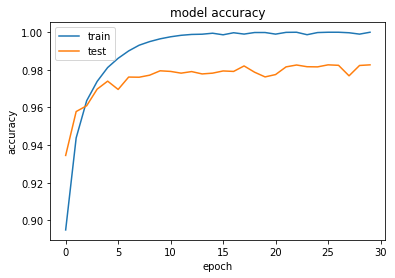

In [17]:
%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Finally we can graph the loss history over each iteration .

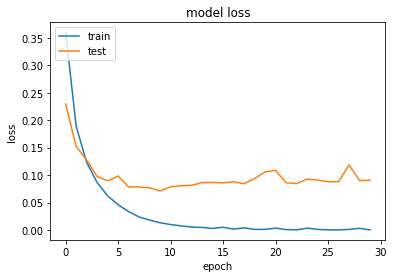

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Step 9: Create predictions on the test set

Finally to create predictions using specific data we can use the predict_classes() function.

The next code take the first 10 samples of the test set, pass each one to the model for prediction, print the resulting prediction with the respective true classification label and show the image.

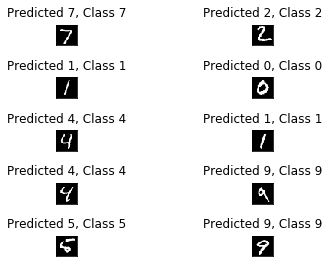

In [19]:
predicted_classes = model.predict_classes(x_test[0:10])# predict the first 10 samples
x_test = x_test.reshape(x_test.shape[0], 28, 28)# reshape the test set to the original shape for image plotting 

for i, predicted_class in enumerate(predicted_classes):
    plt.subplot(5,2,i+1)
    plt.tight_layout()#add margin between each image
    plt.imshow(x_test[i], cmap='Greys_r', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_class, numpy.argmax(y_test[i])), y=1.08)
    plt.xticks([])
    plt.yticks([])
plt.show()